## Analyze A/B Test Results
#### by Theodora Koutsothanasi


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

In this project, we conduct an AB test to test the performance of an old website compared with a new website version. 

We use the bootstraping method for the hypothesis testing.

#### Part I - Probability

Import the libraries

In [17]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` We read the `ab_data.csv` data and we store it in `df`.

a.  Take a look in the Dataset

In [19]:
df=pd.read_csv(r'C:\Users\t.koutsothanasi\Documents\AdHoc Analyses\Udacity\ab_data.csv')

In [20]:
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [21]:
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


Calculations:

b. The number of rows in the dataset.

In [22]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [23]:
df.nunique()['user_id']

290584

d. The proportion of users converted.

In [24]:
prop=df.query('converted == 1').user_id.nunique()/df.nunique()['user_id']
print(prop)

0.12104245244060237


e. The number of times the `new_page` and `treatment` don't line up.

In [25]:
m=df.query('landing_page=="new_page" and not group=="treatment"').user_id.nunique()
n=df.query('landing_page=="old_page" and group=="treatment"').user_id.nunique()
print(m+n)

3893


f. Find if any row has missing values?

In [26]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. We use the answer to the quiz to create a new dataset that meets the specifications from the quiz and we store it in a new dataframe called **df2**.

In [27]:
df2=df.query('(landing_page=="new_page" and group=="treatment") or (landing_page=="old_page" and group=="control")')

df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [28]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [29]:
df2.nunique()['user_id']

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [30]:
ids=df2["user_id"]

df2[ids.isin(ids[ids.duplicated()])]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

The row information is that the user_id belonged in the treatment group and received the new_page.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [31]:
df2.drop(2893, inplace=True)

C:\Users\t.koutsothanasi\AppData\Local\Continuum\anaconda3\ipython\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [32]:
df2.describe()

,user_id,converted
count,290584.000000,290584.000000
mean,788004.876222,0.119597
std,91224.735468,0.324490
min,630000.000000,0.000000
25%,709034.750000,0.000000
50%,787995.500000,0.000000
75%,866956.250000,0.000000
max,945999.000000,1.000000


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [33]:
# Propability regardless group type

prop=df2.query('converted == 1').user_id.nunique()/df2.nunique()['user_id']
print(prop)

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [34]:
control_df=df2.query('group == "control"')

prob_ctr=control_df.query('converted==1').user_id.nunique()/control_df.nunique()['user_id']

print(prob_ctr)

0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [35]:
treatment_df=df2.query('group == "treatment"')

prob_trt=treatment_df.query('converted==1').user_id.nunique()/treatment_df.nunique()['user_id']

print('The probability they converted for the users in the treatment group is',prob_trt)

obs_diff=prob_trt-prob_ctr

print('Difference new page from the existing page',obs_diff*100,'%')

The probability they converted for the users in the treatment group is 0.11880806551510564
Difference new page from the existing page -0.15782389853555567 %


d. What is the probability that an individual received the new page?

In [36]:
newpage_df=df2.query('landing_page == "new_page"')

prob_np=newpage_df.user_id.nunique()/df2.nunique()['user_id']

print(prob_np)

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Until now there is no sufficient evidence to say that new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

`1.` Hypotheses testing. As null hypothesis we consider that old page is the same or even better than the new. The alternative hypothesis (H1) is that the new page is better than the old one.

Ho: $p_{new}$-$p_{old}$<=0
H1: $p_{new}$-$p_{old}$>0

`2.` 
For the null hypothesis we assume that $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [37]:
prop

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [38]:
prop

0.11959708724499628

c. What is $n_{new}$?

In [39]:
n_new=df2.query('landing_page=="new_page"').shape[0]
n_new

145310

d. What is $n_{old}$?

In [40]:
n_old=df2.query('landing_page=="old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [41]:
new_page_converted=np.random.choice([0,1],size=n_new,p=[(1-prop),prop])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [42]:
old_page_converted=np.random.choice([0,1],size=n_old,p=[(1-prop),prop])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [43]:
new_page_converted.mean()-old_page_converted.mean()

-0.0003256215320036615

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [44]:
p_diffs=[]

for i in range(10000):
    new_page_converted=np.random.choice([0,1],size=n_new,p=[(1-prop),prop])
    old_page_converted=np.random.choice([0,1],size=n_old,p=[(1-prop),prop])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())
    

In [45]:
p_diffs=np.asarray(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

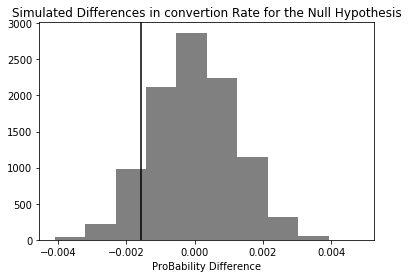

In [46]:
plt.hist(p_diffs,color='grey')
plt.title('Simulated Differences in convertion Rate for the Null Hypothesis',fontsize=12,color='black')
plt.xlabel("ProBability Difference")
plt.axvline(prob_trt-prob_ctr,color='black');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [47]:
act_diff=prob_trt-prob_ctr

(p_diffs>act_diff).mean()

0.9017

k. Hypotheses Test Result

The p-value is 0.9076. In order to reject the null hypothesis p-value should be below the typical a level of 0.005. (An a level of 0.05 means that we have 5%  chance to make a Type I errorif the null is true). In this case p-value is far greater than a, as a result we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [53]:
import statsmodels.api as sm

convert_old = df2.query('group=="control" & converted==1')['converted'].count()
convert_new = df2.query('group=="treatment" & converted==1')['converted'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [54]:
sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative='larger')

(-1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The values obtained from the bootstrapped hypothesis testing meet the z-score. Consequently, we remain at the status that we fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, we see that the result we acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We can use Logistic regression, using dummies (0,1) depending which page receives each individual.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [55]:
df2[['ab_page','old_page']]=pd.get_dummies(df2['landing_page'])
df2['intercept']=1
df2.head()

C:\Users\t.koutsothanasi\AppData\Local\Continuum\anaconda3\ipython\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\Users\t.koutsothanasi\AppData\Local\Continuum\anaconda3\ipython\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,user_id,timestamp,group,landing_page,converted,ab_page,old_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [56]:
log_mod=sm.Logit(df2['converted'],df2[['intercept','ab_page']])
result=log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [57]:
from scipy import stats
stats.chisqprob=lambda chisq,df:stats.chi2sf(chisq,df)
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        11:47:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

The p-value is 0.190 here and remains above the a level of 0.05. Still, we fail to reject the null hypothesis.

The p-value obtained in the hypothis testing corresponds to a one-tailed test.The regression model we used is a two tailed test.Finding a high p-value in the regression model means that there is no correlation between the landing page type (old-new_page) and the conversion rate, implying that the p_new is equal to p_old.

Two tailed test:
Ho: $p_{new}$ =$p_{old}$
H1: $p_{new}$ <>$p_{old}$ 

In this case we fail to reject the null hypothesis (Ho)


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

We also have information about where the user lives. Perhaps, it is a good idea to incorporate this data into the model, since country may influence the result for conversion or no conversion.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives.

In [40]:
countries_df = pd.read_csv(r'C:\Users\t.koutsothanasi\Documents\AdHoc Analyses\Udacity\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [41]:
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [42]:
### Create the necessary dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.
Provide the summary results, and your conclusions based on the results.

In [43]:
### Fit Your Linear Model And Obtain the Results
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               1.521e-05
Time:                        11:35:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

Again, the p-values are higher than the a level of 0.05%, hence we cannot reject the null hypothesis.

In [44]:
# Create new dummies for the countries, merging page and countries information
df_new['US_page'] = df_new['US'] * df_new['ab_page']
df_new['UK_page'] = df_new['UK'] * df_new['ab_page']
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,old_page,intercept,CA,UK,US,US_page,UK_page
user_id,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1


In [45]:
# Logistic regression 
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US', 'UK', 'US_page', 'UK_page']])
result = log_mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 02 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        11:35:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US_page        0.0469      0.054      0.872      0.383      -0.059       0.152
UK_page        0.0783      0.057      1.378      0.168      -0.033       0.190
==============================================================================
"""

Sinnce the p-values are higher than a (0.05%), we cannot say that there is an interaction between the countries that users live and the conversion rate based on the pages they receive.

<a id='conclusions'></a>
## Conclusions

Based on the available data, we do not have sufficient evidence to suggest that the new page leads to more conversions than the old page. We conducted a hypothesis testing and a logistic regression model and p-values were significantly greater than the a level of 0.05% in both tests.Consequently we failed to reject the null hypothesis.

In the last part of the analysis, we also included the country that each user lives as an additional variable.
The p-values were again higher than a (0.05%).Hence, we fail to reject the null and say that country influence the result for conversion or no conversion.

The last step was to look at an interaction between country and page to see if there significant effects on conversion. The p-values were greater than a and we failed to reject the null hypothesis. 

To conclude, there is no sufficient evidence to prove that the new page is better than the old page in the matter of conversion rate.We need more evidence to say that country variable influences the conversion result or that there is an interaction between page and country effects the conversion.

<a id='Resources'></a>
## Resources

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce